In [18]:
import numpy as np
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [19]:
df = pd.read_csv("TravelInsurancePrediction.csv")

In [20]:
print(len(df))
df.head(10)

1987


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [21]:
print(df.nunique())

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64


In [22]:
# Feature Engineering, by converting YES and NO to 0 or 1. 
x = df['Employment Type'].values
df['Employment Type']=np.select([x == "Government Sector", x == "Private Sector/Self Employed"], [0,1])
x = df['GraduateOrNot'].values
df['GraduateOrNot']=np.select([x == "NO", x == "YES"], [0,1])
x = df['ChronicDiseases'].values
df['ChronicDiseases']=np.select([x == "NO", x == "YES"], [0,1])
x = df['FrequentFlyer'].values
df['FrequentFlyer']=np.select([x == "NO", x == "YES"], [0,1])
x = df['EverTravelledAbroad'].values
df['EverTravelledAbroad']=np.select([x == "NO", x == "YES"], [0,1])

df.head(10)
df = df.drop(['Unnamed: 0'], axis = 1)


In [23]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Ok, no missing values.

In [24]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

Showing df is roughly balanced as it is split around 2:1

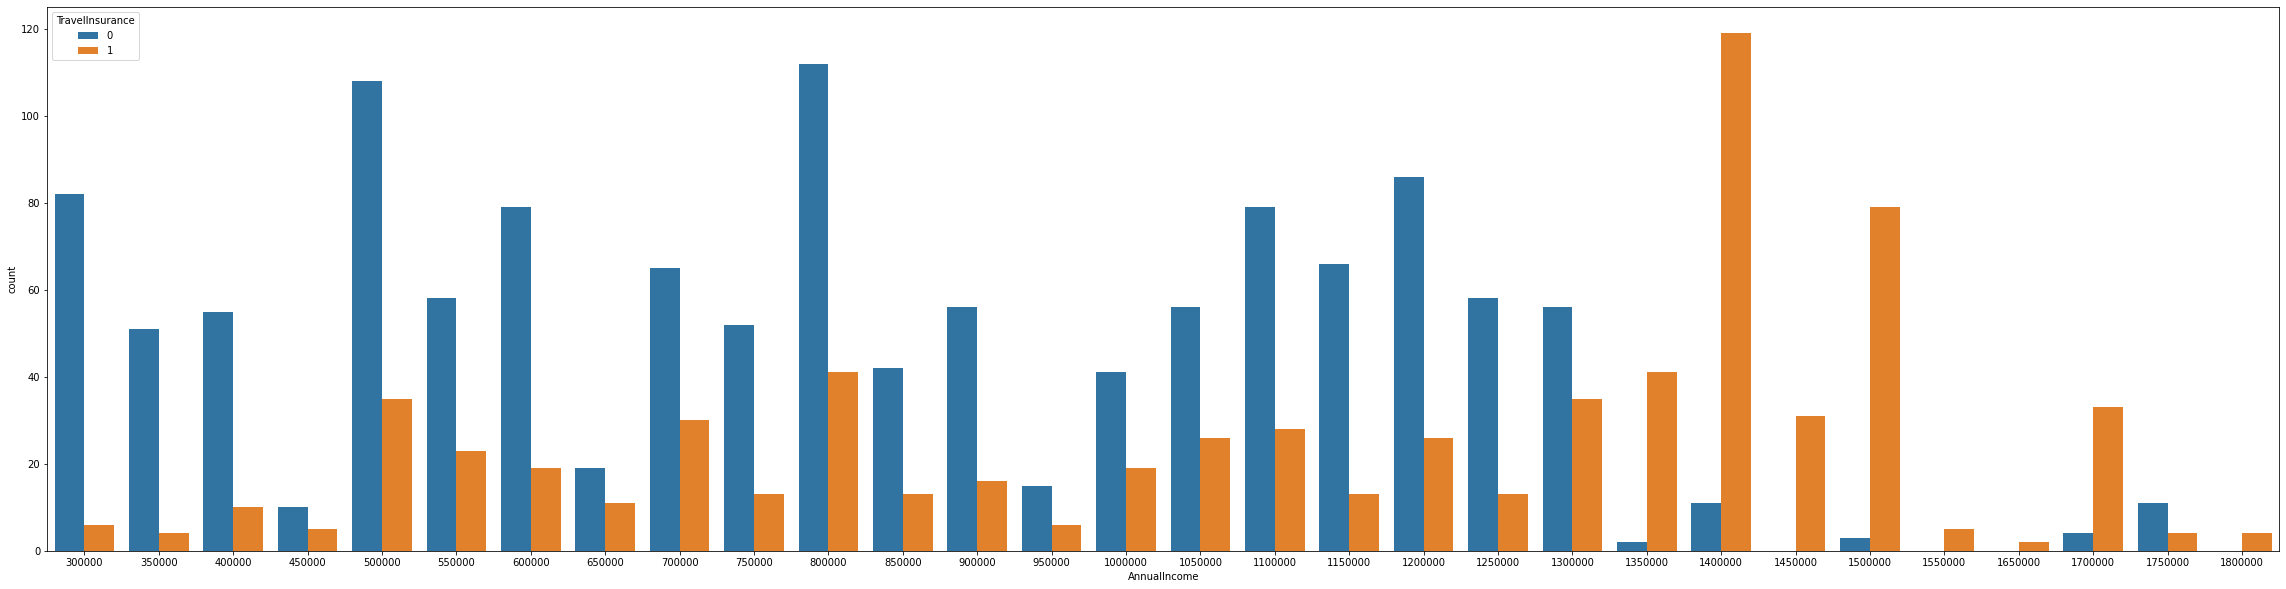

In [25]:
plt.figure(figsize=(40,10))
sns.countplot('AnnualIncome',hue='TravelInsurance',data=df)
plt.show()

Clearly the majority of people with salaries of less than 1,350,000 don't take an insurance claim, whilst those with more do take an insurance claim.
However, with only 30 unique salaries, 1,750,000 is an outlier so I will remove it for training improvement.

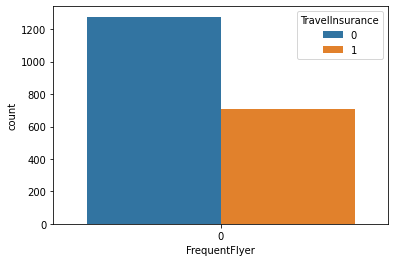

In [26]:
sns.countplot('FrequentFlyer',hue='TravelInsurance',data=df)
plt.show()

Frequent flyers are more likely to take travel insurance.

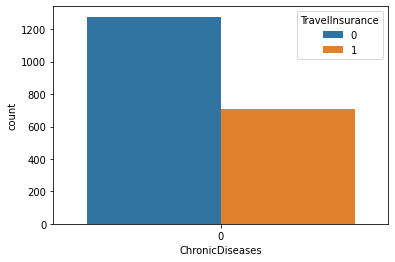

In [27]:
sns.countplot('ChronicDiseases',hue='TravelInsurance',data=df)
plt.show()

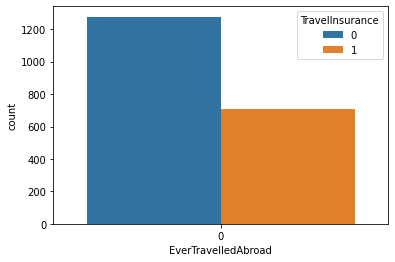

In [28]:
sns.countplot('EverTravelledAbroad',hue='TravelInsurance',data=df)
plt.show()

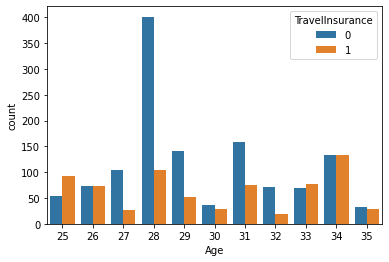

In [29]:
sns.countplot('Age',hue='TravelInsurance',data=df)
plt.show()

Age doesn't seem to directly correlate with taking out travel insurance.

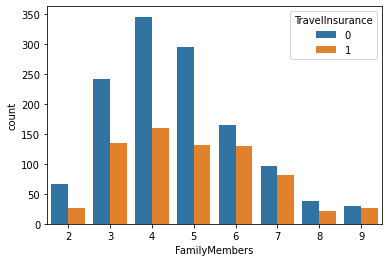

In [30]:
sns.countplot('FamilyMembers',hue='TravelInsurance',data=df)
plt.show()

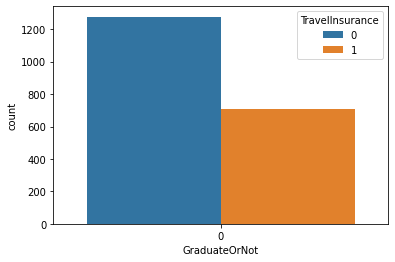

In [31]:
sns.countplot('GraduateOrNot',hue='TravelInsurance',data=df)
plt.show()

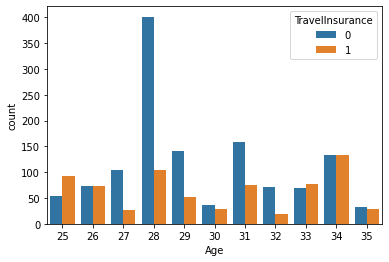

In [32]:
sns.countplot('Age',hue='TravelInsurance',data=df)
plt.show()

# Feature engineering

People with salaries of 1,350,000 or more are strongly correlated with taking out insurance claims so I will encode it.

In [33]:
x = df['AnnualIncome']
df['AnnualIncome']=np.select([x < 1350000, x >= 1350000], [0,1])
df = df[df['AnnualIncome'] != 1700000] 

# Model learning

In [34]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# get importance
print(df.columns)
clf.feature_importances_


Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


array([0.03071481, 0.01292596, 0.        , 0.8905196 , 0.06583954,
       0.        , 0.        , 0.        ], dtype=float32)

In [35]:
#Drop any feature with 0 importance 
df = df.drop(['GraduateOrNot', 'ChronicDiseases',	'FrequentFlyer',
'EverTravelledAbroad'], axis = 1)
df.head(10)

,Age,Employment Type,AnnualIncome,FamilyMembers,TravelInsurance
0,31,0,0,6,0
1,31,1,0,7,0
2,34,1,0,4,1
3,28,1,0,3,0
4,28,1,0,8,0
5,25,1,0,4,0
6,31,0,0,4,0
7,31,1,1,3,1
8,28,1,1,6,1
9,33,0,0,3,0


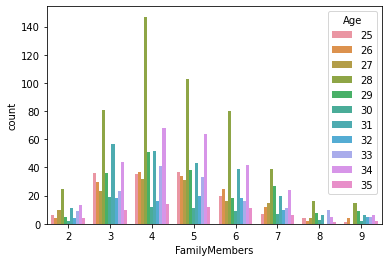

Index(['Age', 'Employment Type', 'AnnualIncome', 'FamilyMembers',
       'TravelInsurance'],
      dtype='object')


array([0.03071481, 0.01292596, 0.        , 0.8905196 , 0.06583954,
       0.        , 0.        , 0.        ], dtype=float32)

In [36]:
sns.countplot('FamilyMembers',hue='Age',data=df)
plt.show()

plt.show()
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# get importance
print(df.columns)
clf.feature_importances_

XGBoost Classification Accuracy is: 84.10 %


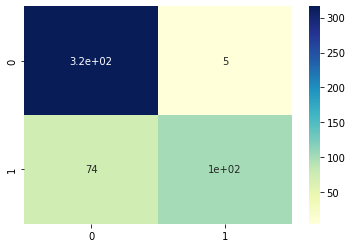

In [37]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, cmap = 'YlGnBu', annot=True)
print("XGBoost Classification Accuracy is: {:.2f} %".format(100*accuracy_score(y_test, y_pred)))

In [38]:
    """## Applying K-Fold Cross Validation##"""
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
    print("K-Fold Cross Validation Accuracy is: {:.2f} %".format(accuracies.mean()*100))
    print("K-Fold Cross Validation Standard Deviation is: {:.2f} %".format(accuracies.std()*100))

K-Fold Cross Validation Accuracy is: 82.75 %
K-Fold Cross Validation Standard Deviation is: 2.74 %


In [39]:
df.head(10)

,Age,Employment Type,AnnualIncome,FamilyMembers,TravelInsurance
0,31,0,0,6,0
1,31,1,0,7,0
2,34,1,0,4,1
3,28,1,0,3,0
4,28,1,0,8,0
5,25,1,0,4,0
6,31,0,0,4,0
7,31,1,1,3,1
8,28,1,1,6,1
9,33,0,0,3,0


USING K-MEANS CLUSTERING FOR TWO MOST IMPORTANT FEATURES (AGE and FAMILY MEMBERS)

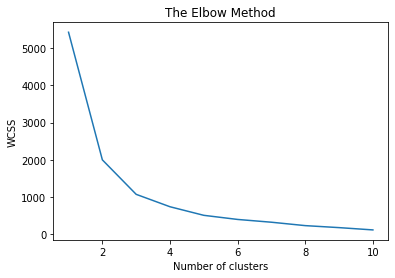

In [40]:
X = df.iloc[:, 2:-1].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

FROM GRAPH, OPTIMAL NUMBER OF CLUSTERS IS 3

In [41]:
#Training the K Means on the data.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
#42 is superstition haha, no particular reasons
y_kmeans = kmeans.fit_predict(X)
#No need to split data into train and test
print(y_kmeans)
print(len(y_kmeans))

[2 1 0 ... 2 2 0]
1987


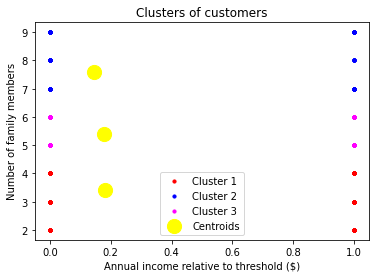

In [42]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income relative to threshold ($)')
plt.ylabel('Number of family members')
plt.legend()
plt.show()

SHOWING ALTERNATIVE VISUALISATION WITH HIERARCHICAL CLUSTERING

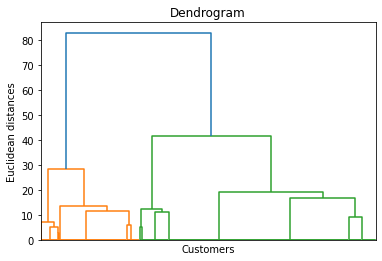

In [43]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.xticks([])
plt.ylabel('Euclidean distances')
plt.show()

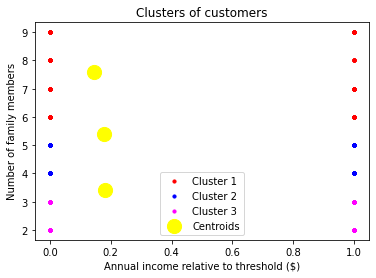

In [44]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 10, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income relative to threshold ($)')
plt.ylabel('Number of family members')
plt.legend()
plt.show()